## Download data  

In [ ]:
!gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:01<00:00, 43.6MB/s]


## Giải nén data

In [ ]:
!unzip -q "/content/FER-2013.zip"

## Load và xử lý data dạng ảnh 

### Cách xử lý data dùng image_dataset_from_directory

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
batch_size = 256
img_height = 48
img_width = 48
train_dir = "/content/train" 
test_dir = "/content/test"   

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


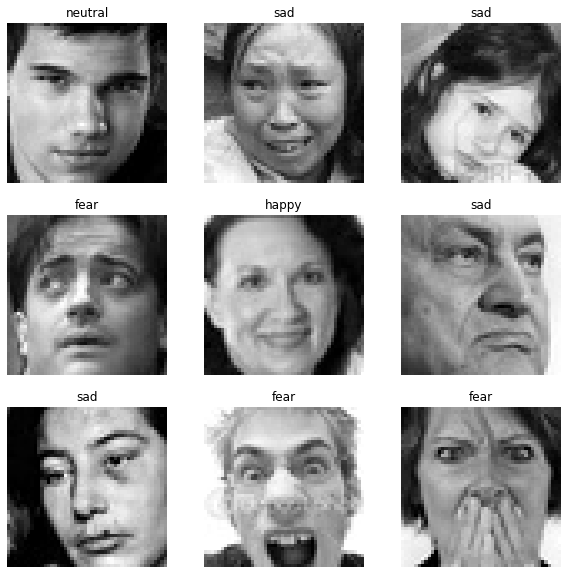

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(images[i].numpy()).astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalized_train_ds = train_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalized_train_ds = normalized_train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
normalized_val_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

##### Softmax Regression

In [ ]:
num_class = 7

######################### YOUR CODE HERE #########################
# Sử dụng tf.keras.Sequential để thiết kế model theo yêu cầu đề  bài 
FER_SR_model = tf.keras.Sequential([
    # Flaten layer: input shape = (48,48,1)

    # Dense layer: 7 nodes (num_class)

])

FER_SR_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.006)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
FER_SR_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
FER_SR_history = FER_SR_model.fit(train_ds, validation_data=val_ds, epochs=100)
# Epoch 1/30
#90/90 [==============================] - 12s 41ms/step - loss: 2048181.8750 - accuracy: 0.1762 - val_loss: 2845097.5000 - val_accuracy: 0.1813


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 7)                 16135     
                                                                 
Total params: 16,135
Trainable params: 16,135
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
90/90 [==============================] - 16s 17ms/step - loss: 88298.1016 - accuracy: 0.1747 - val_loss: 51910.7773 - val_accuracy: 0.1832
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 74353.0234 - accuracy: 0.1921 - val_loss: 98225.1406 - val_accuracy: 0.1913
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 70784.8828 - accuracy: 0.2002 - val_loss: 70453.3047 - val_accuracy: 0.2237

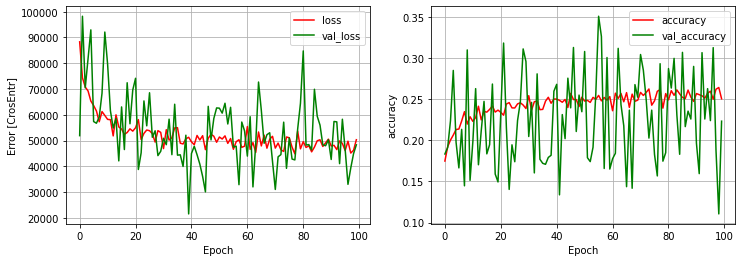

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SR_history.history['loss'], label='loss', color='red')
plt.plot(FER_SR_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SR_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SR_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


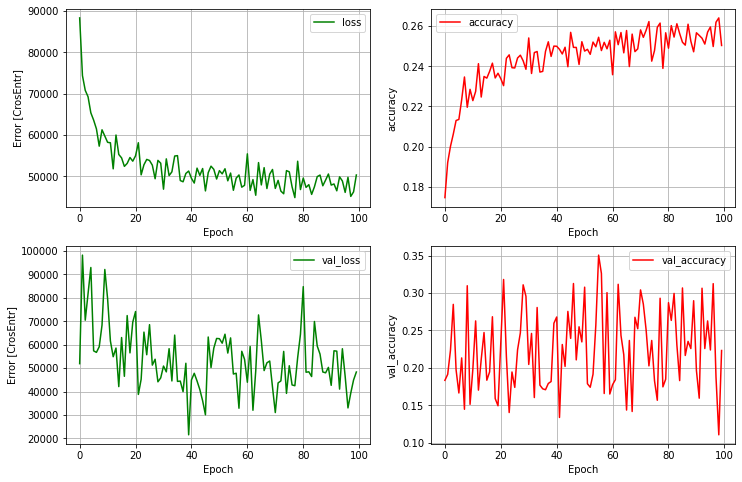

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(FER_SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(FER_SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(FER_SR_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(FER_SR_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(FER_SR_history.history)
hist['epoch'] = FER_SR_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,46120.832031,0.259535,46452.019531,0.223829,95
96,49763.980469,0.249826,33024.734375,0.312489,96
97,45152.656250,0.261930,39373.820312,0.187598,97
98,46242.656250,0.264063,44931.300781,0.110434,98
99,50329.695312,0.250348,48348.710938,0.223132,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.2640630304813385
Max val acc:  0.3506357669830322
Min train loss:  44859.5625
Min val loss:  21552.60546875
